In [37]:
import pandas as pd
from os import path
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.preprocessing.timeseries.utils import real_data_loading

In [38]:
# Constants
DATA_DIR = "dataset/ghg/Summary-emissions-data-Excel-xlsx.xlsx"
SAVE_DIR = "model/timegan_sectors.pkl"

SOTA_1 = "model/timegan_sectors_2.pkl"
SOTA_2 = "model/timegan_sectors_3.pkl"

SAVE_DIR = SOTA_2

In [39]:
df_sectors = pd.read_excel(DATA_DIR, header=1)
cols = list(df_sectors.columns)

print(df_sectors.shape)
df_sectors.head()

(32, 9)


,Year,Energy,Industrial processes and product use (IPPU),Agriculture,Waste,Tokelau (gross emissions),"Land use, land-use change and forestry (LULUCF)",Net emissions (with LULUCF),Gross emissions (without LULUCF)
0,1990,23880.303442,3579.924135,33312.045282,3944.630834,3.167755,-20171.229205,44548.842243,64720.071448
1,1991,24346.489991,3728.611122,33557.064118,4052.986979,3.279540,-22160.795674,43527.636076,65688.431751
2,1992,26189.902607,3374.092613,33113.285041,4154.459834,3.242200,-22014.719888,44820.262407,66834.982295
3,1993,25710.740884,3213.572924,33506.028563,4260.278577,3.205152,-22935.401628,43758.424473,66693.826100
4,1994,26020.677588,3087.589605,34605.101859,4142.691112,3.171920,-22910.455187,44948.776897,67859.232084


In [55]:
# Define model parameters
gan_args = ModelParameters(batch_size=32,
                           lr=5e-4,
                           noise_dim=32,
                           layers_dim=128,
                           latent_dim=24,
                           gamma=1)

train_args = TrainParameters(epochs=15000,
                             sequence_length=32,
                             number_sequences=9)

In [57]:
if path.exists(SAVE_DIR):
    synth = TimeSeriesSynthesizer.load(SAVE_DIR)
else:
    synth = TimeSeriesSynthesizer(modelname='timegan', model_parameters=gan_args)
    synth.fit(df_sectors, train_args, num_cols=cols)
    synth.save(SAVE_DIR)

In [42]:
df_sectors_scaled = real_data_loading(df_sectors, 24)
synth_data = synth.sample(n_samples=24)

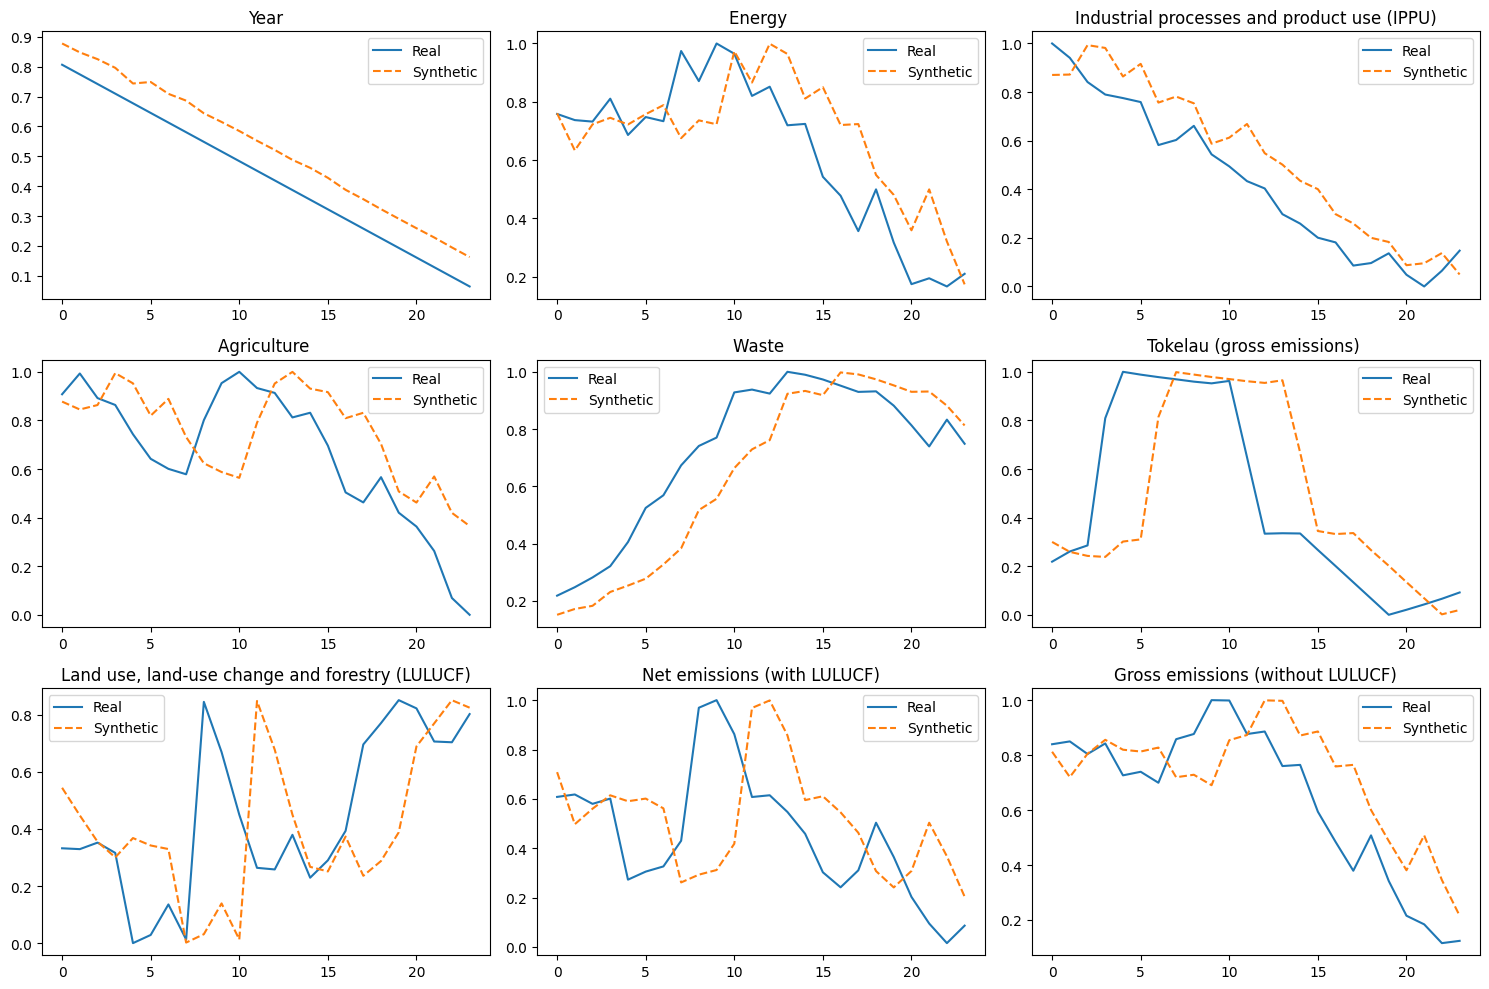

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

time = list(range(1,9))
obs = 1
n_cols = cols

for j, col in enumerate(n_cols):
    df = pd.DataFrame({'Real': df_sectors_scaled[obs][:, j],
                   'Synthetic': synth_data[obs].iloc[:, j]})
    df.plot(ax=axes[j],
            title = col,
            secondary_y='Synthetic data', style=['-', '--'])
fig.tight_layout()